# Exploratory Data Analysis: Combined Prevalence and Exogenous Variables

This notebook explores the `combined_prevalence_and_exogenous.csv` dataset containing COVID-19 data for Illinois counties.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

# Display settings
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

## 1. Load and Inspect Data

In [2]:
# Load the dataset
df = pd.read_csv('../processed data/combined_prevalence_and_exogenous.csv')

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

print(f"Dataset shape: {df.shape}")
print(f"\nDate range: {df['date'].min()} to {df['date'].max()}")
print(f"Number of counties: {df['location'].nunique()}")
print(f"Total days: {(df['date'].max() - df['date'].min()).days}")

Dataset shape: (9413, 41)

Date range: 2020-10-27 00:00:00 to 2023-05-10 00:00:00
Number of counties: 97
Total days: 925


In [3]:
# Display first few rows
df.head(10)

,date,confirmed,deaths,recovered,tests,vaccines,people_vaccinated,people_fully_vaccinated,hosp,icu,vent,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,facial_coverings,vaccination_policy,elderly_people_protection,government_response_index,stringency_index,containment_health_index,economic_support_index,administrative_area_level,administrative_area_level_1,administrative_area_level_3,latitude,longitude,population,location,key_nuts,Alpha,Delta,Epsilon,Iota
0,2021-04-28,463.0,11.0,NaN,NaN,NaN,1302.0,972.0,NaN,NaN,NaN,1.0,1.0,1.0,3.0,0.0,1.0,2.0,3.0,2.0,3.0,1.0,4.0,5.0,3.0,63.80,52.78,63.99,62.5,3,United States,Alexander,37.15312,-89.347391,5761,17003,NaN,1.0,0.0,0.0,0.0
1,2021-07-19,479.0,11.0,NaN,NaN,NaN,1562.0,1197.0,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,2.0,3.0,1.0,2.0,5.0,1.0,45.31,31.48,42.86,62.5,3,United States,Alexander,37.15312,-89.347391,5761,17003,NaN,0.0,1.0,0.0,0.0
2,2021-07-23,485.0,11.0,NaN,NaN,NaN,1574.0,1207.0,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,2.0,3.0,1.0,2.0,5.0,1.0,44.27,29.63,41.67,62.5,3,United States,Alexander,37.15312,-89.347391,5761,17003,NaN,0.0,1.0,0.0,0.0
3,2021-08-23,565.0,11.0,NaN,NaN,NaN,1692.0,1299.0,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,3.0,1.0,2.0,5.0,1.0,43.23,25.93,40.48,62.5,3,United States,Alexander,37.15312,-89.347391,5761,17003,NaN,0.0,1.0,0.0,0.0
4,2021-08-24,571.0,11.0,NaN,NaN,NaN,1699.0,1304.0,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,3.0,1.0,2.0,5.0,1.0,43.23,25.93,40.48,62.5,3,United States,Alexander,37.15312,-89.347391,5761,17003,NaN,0.0,1.0,0.0,0.0
5,2021-08-26,586.0,11.0,NaN,NaN,NaN,1716.0,1313.0,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,3.0,1.0,2.0,5.0,1.0,43.23,25.93,40.48,62.5,3,United States,Alexander,37.15312,-89.347391,5761,17003,NaN,0.0,1.0,0.0,0.0
6,2021-09-01,614.0,11.0,NaN,NaN,NaN,1746.0,1333.0,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,3.0,1.0,2.0,5.0,1.0,43.23,25.93,40.48,62.5,3,United States,Alexander,37.15312,-89.347391,5761,17003,NaN,0.0,1.0,0.0,0.0
7,2021-09-07,632.0,11.0,NaN,NaN,NaN,1778.0,1349.0,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,3.0,1.0,2.0,5.0,1.0,43.23,25.93,40.48,62.5,3,United States,Alexander,37.15312,-89.347391,5761,17003,NaN,0.0,1.0,0.0,0.0
8,2021-09-30,685.0,11.0,NaN,NaN,NaN,1866.0,1436.0,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,3.0,2.0,2.0,5.0,2.0,45.31,25.93,46.43,37.5,3,United States,Alexander,37.15312,-89.347391,5761,17003,NaN,0.0,1.0,0.0,0.0
9,2021-10-25,741.0,12.0,NaN,NaN,NaN,1921.0,1494.0,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,3.0,2.0,2.0,5.0,2.0,45.31,25.93,46.43,37.5,3,United States,Alexander,37.15312,-89.347391,5761,17003,NaN,0.0,1.0,0.0,0.0


In [4]:
# Data types and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9413 entries, 0 to 9412
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 9413 non-null   datetime64[ns]
 1   confirmed                            9395 non-null   float64       
 2   deaths                               9395 non-null   float64       
 3   recovered                            0 non-null      float64       
 4   tests                                0 non-null      float64       
 5   vaccines                             0 non-null      float64       
 6   people_vaccinated                    7192 non-null   float64       
 7   people_fully_vaccinated              7192 non-null   float64       
 8   hosp                                 0 non-null      float64       
 9   icu                                  0 non-null      float64       
 10  vent        

In [7]:
# Print columns with all NaN values
full_nan_cols = df.columns[df.isnull().all()].tolist()
print("Columns with all NaN values:", full_nan_cols)

# Drop columns with all NaN values
df.drop(columns=full_nan_cols, inplace=True)
print("Columns dropped:", full_nan_cols)

Columns with all NaN values: ['recovered', 'tests', 'vaccines', 'hosp', 'icu', 'vent', 'key_nuts']
Columns dropped: ['recovered', 'tests', 'vaccines', 'hosp', 'icu', 'vent', 'key_nuts']


In [8]:
# Column categories
print("=" * 70)
print("COLUMN CATEGORIES")
print("=" * 70)

variant_cols = ['Alpha', 'Delta', 'Epsilon', 'Iota']
outcome_cols = ['confirmed', 'deaths', 'recovered', 'tests', 'vaccines', 
                'people_vaccinated', 'people_fully_vaccinated', 'hosp', 'icu', 'vent']
policy_cols = [col for col in df.columns if 'closing' in col or 'restrictions' in col or 
               'policy' in col or 'index' in col or 'protection' in col or 
               'campaigns' in col or 'tracing' in col or 'coverings' in col or 'cancel' in col]
geo_cols = ['location', 'latitude', 'longitude', 'population']

print(f"\nVariant columns ({len(variant_cols)}): {variant_cols}")
print(f"\nOutcome columns ({len(outcome_cols)}): {outcome_cols}")
print(f"\nPolicy columns ({len(policy_cols)}): {policy_cols}")
print(f"\nGeographic columns ({len(geo_cols)}): {geo_cols}")

COLUMN CATEGORIES

Variant columns (4): ['Alpha', 'Delta', 'Epsilon', 'Iota']

Outcome columns (10): ['confirmed', 'deaths', 'recovered', 'tests', 'vaccines', 'people_vaccinated', 'people_fully_vaccinated', 'hosp', 'icu', 'vent']

Policy columns (18): ['school_closing', 'workplace_closing', 'cancel_events', 'gatherings_restrictions', 'transport_closing', 'stay_home_restrictions', 'internal_movement_restrictions', 'international_movement_restrictions', 'information_campaigns', 'testing_policy', 'contact_tracing', 'facial_coverings', 'vaccination_policy', 'elderly_people_protection', 'government_response_index', 'stringency_index', 'containment_health_index', 'economic_support_index']

Geographic columns (4): ['location', 'latitude', 'longitude', 'population']


## 2. Missing Data Analysis

In [9]:
# Missing values summary
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Missing_Percentage': missing_pct
}).sort_values('Missing_Percentage', ascending=False)

# Show only columns with missing values
missing_df[missing_df['Missing_Count'] > 0]

,Missing_Count,Missing_Percentage
people_vaccinated,2221,23.595028
people_fully_vaccinated,2221,23.595028
vaccination_policy,505,5.364921
international_movement_restrictions,505,5.364921
economic_support_index,505,5.364921
containment_health_index,505,5.364921
stringency_index,505,5.364921
government_response_index,505,5.364921
elderly_people_protection,505,5.364921
facial_coverings,505,5.364921


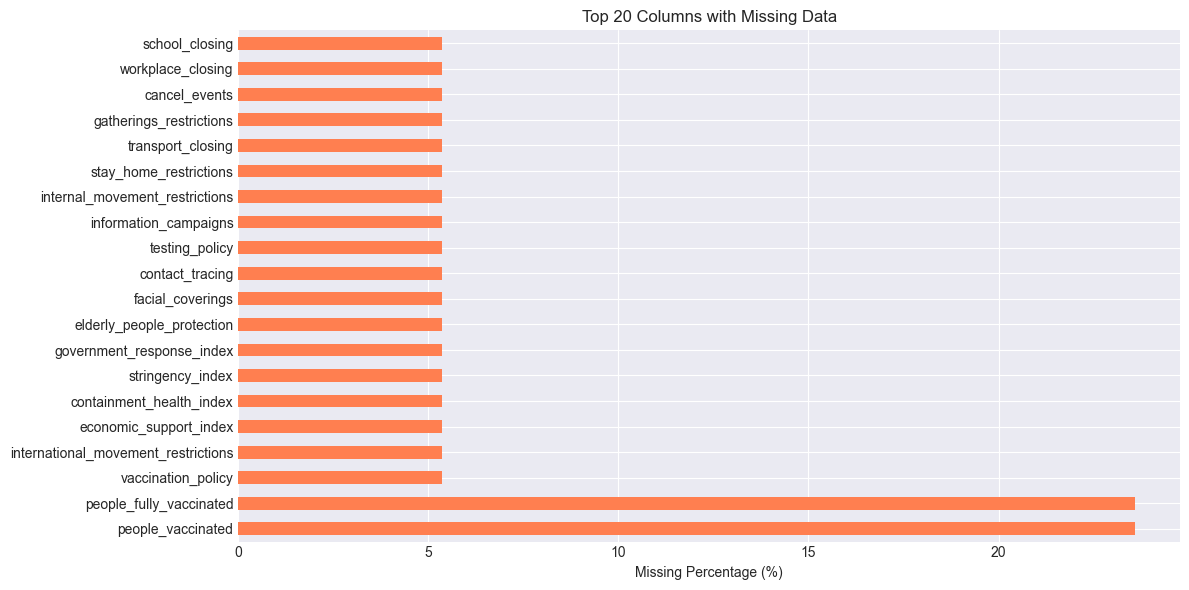

In [10]:
# Visualize missing data
fig, ax = plt.subplots(figsize=(12, 6))
missing_cols = missing_df[missing_df['Missing_Count'] > 0].head(20)
missing_cols['Missing_Percentage'].plot(kind='barh', ax=ax, color='coral')
ax.set_xlabel('Missing Percentage (%)')
ax.set_title('Top 20 Columns with Missing Data')
plt.tight_layout()
plt.show()

## 3. Summary Statistics

In [11]:
# Numeric columns summary
df.describe()

,date,confirmed,deaths,people_vaccinated,people_fully_vaccinated,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,facial_coverings,vaccination_policy,elderly_people_protection,government_response_index,stringency_index,containment_health_index,economic_support_index,administrative_area_level,latitude,longitude,population,location,Alpha,Delta,Epsilon,Iota
count,9413,9.395000e+03,9395.000000,7.192000e+03,7.192000e+03,8908.000000,8908.000000,8908.000000,8908.000000,8908.0,8908.000000,8908.000000,8908.000000,8908.0,8908.0,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,9413.0,9413.000000,9413.000000,9.413000e+03,9413.000000,9413.000000,9413.000000,9413.000000,9413.000000
mean,2022-01-13 07:18:17.248486144,1.124189e+05,1463.369558,3.473181e+05,2.869942e+05,1.018186,0.185115,0.315784,0.579479,0.0,0.188707,1.204423,3.543332,2.0,3.0,1.620903,2.213853,4.809834,1.859901,48.507591,33.291828,49.099578,44.356197,3.0,40.222598,-89.051398,5.948543e+05,17103.362690,0.102345,0.318217,0.005769,0.003276
min,2020-10-27 00:00:00,3.060000e+02,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,3.000000,2.0,3.0,1.000000,1.000000,0.000000,1.000000,42.190000,25.000000,39.290000,12.500000,3.0,37.153120,-91.187715,3.821000e+03,17001.000000,0.000000,0.000000,0.000000,0.000000
25%,2021-08-02 00:00:00,5.053500e+03,90.000000,1.173600e+04,9.451750e+03,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,3.000000,2.0,3.0,1.000000,2.000000,5.000000,1.000000,44.790000,25.930000,45.830000,37.500000,3.0,38.825130,-89.829998,2.968200e+04,17045.000000,0.000000,0.000000,0.000000,0.000000
50%,2021-12-23 00:00:00,1.417200e+04,191.000000,3.138750e+04,2.518650e+04,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,4.000000,2.0,3.0,2.000000,2.000000,5.000000,2.000000,45.310000,28.700000,47.020000,37.500000,3.0,40.248285,-88.982312,6.543500e+04,17103.000000,0.000000,0.000000,0.000000,0.000000
75%,2022-07-01 00:00:00,6.020900e+04,651.000000,1.456825e+05,1.147775e+05,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,4.000000,2.0,3.0,2.000000,2.000000,5.000000,2.000000,46.880000,33.330000,48.210000,62.500000,3.0,41.592581,-88.181286,2.629660e+05,17157.000000,0.000000,1.000000,0.000000,0.000000
max,2023-05-10 00:00:00,1.541156e+06,15884.000000,4.335968e+06,3.876105e+06,3.000000,1.000000,2.000000,4.000000,0.0,1.000000,2.000000,4.000000,2.0,3.0,2.000000,4.000000,5.000000,3.000000,67.080000,66.670000,67.740000,62.500000,3.0,42.354090,-87.714404,5.150233e+06,17201.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,2.931012e+05,3687.600860,9.289451e+05,7.894566e+05,0.691335,0.388412,0.491159,1.206748,0.0,0.391297,0.403302,0.498147,0.0,0.0,0.485190,0.787634,0.638556,0.689392,7.040126,10.584987,7.043934,17.140615,0.0,1.479770,0.932119,1.425453e+06,58.181017,0.260112,0.454043,0.047831,0.035959


In [12]:
# County-level summary
county_summary = df.groupby('location').agg({
    'date': ['min', 'max', 'count'],
    'confirmed': ['min', 'max'],
    'deaths': ['min', 'max'],
    'population': 'first'
})
county_summary.columns = ['_'.join(col).strip() for col in county_summary.columns.values]
county_summary.head(10)

,date_min,date_max,date_count,confirmed_min,confirmed_max,deaths_min,deaths_max,population_first
location,,,,,,,,
17001,2021-04-22,2023-03-16,203,8243.0,28028.0,146.0,265.0,65435
17003,2021-04-28,2023-03-23,23,463.0,1578.0,11.0,32.0,5761
17005,2021-04-29,2022-10-17,17,2012.0,4968.0,29.0,37.0,16426
17007,2021-04-12,2023-01-03,35,6286.0,17216.0,83.0,137.0,53544
17009,2021-06-01,2022-12-26,22,723.0,2807.0,12.0,23.0,6578
17011,2021-04-08,2022-12-21,81,3466.0,10039.0,92.0,144.0,32628
17013,2021-11-29,2022-12-14,11,778.0,1847.0,5.0,16.0,4739
17015,2021-03-22,2023-03-20,53,1607.0,5032.0,36.0,59.0,14305
17017,2021-04-16,2022-11-28,79,1945.0,5372.0,33.0,47.0,12147


## 4. Variant Prevalence Analysis

In [14]:
import plotly.express as px

# Aggregate variant prevalence over time (average across all counties)
variant_cols = ['Alpha', 'Delta', 'Epsilon', 'Iota']
variant_time = df.groupby('date')[variant_cols].mean().reset_index()

# Melt the dataframe for Plotly
variant_time_melted = variant_time.melt(id_vars='date', value_vars=variant_cols, 
                                         var_name='Variant', value_name='Average Prevalence')

# Create an interactive line plot
fig = px.line(variant_time_melted, x='date', y='Average Prevalence', color='Variant',
              title='COVID-19 Variant Prevalence Over Time (Illinois Average)',
              labels={'Average Prevalence': 'Average Prevalence (Proportion)', 'date': 'Date'})

# Show the plot
fig.show()

In [16]:
import plotly.graph_objects as go

# Create a stacked area plot for variant prevalence
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=variant_time['date'],
    y=variant_time['Alpha'],
    mode='lines',
    name='Alpha',
    stackgroup='one'
))

fig.add_trace(go.Scatter(
    x=variant_time['date'],
    y=variant_time['Delta'],
    mode='lines',
    name='Delta',
    stackgroup='one'
))

fig.add_trace(go.Scatter(
    x=variant_time['date'],
    y=variant_time['Epsilon'],
    mode='lines',
    name='Epsilon',
    stackgroup='one'
))

fig.add_trace(go.Scatter(
    x=variant_time['date'],
    y=variant_time['Iota'],
    mode='lines',
    name='Iota',
    stackgroup='one'
))

fig.update_layout(
    title='Stacked Variant Prevalence Over Time',
    xaxis_title='Date',
    yaxis_title='Cumulative Prevalence',
    legend_title='Variants',
    template='seaborn'
)

fig.show()

In [18]:
import plotly.express as px

# Check if variant shares sum to 1
df['variant_sum'] = df[variant_cols].sum(axis=1)
print(f"Variant sum statistics:")
print(df['variant_sum'].describe())

# Create an interactive histogram
fig = px.histogram(df, x='variant_sum', nbins=50, 
                   title='Distribution of Variant Proportion Sums',
                   labels={'variant_sum': 'Sum of Variant Proportions'},
                   marginal='rug')

# Add a vertical line at sum = 1
fig.add_vline(x=1.0, line_color='red', line_dash='dash', 
               annotation_text='Sum = 1', annotation_position='top right')

# Show the plot
fig.show()

Variant sum statistics:
count    9413.000000
mean        0.429607
std         0.465004
min         0.000000
25%         0.000000
50%         0.055556
75%         1.000000
max         1.000000
Name: variant_sum, dtype: float64


## 5. COVID-19 Outcomes Over Time

In [20]:
# Aggregate outcomes over time, excluding removed columns
outcomes_time = df.groupby('date')[['confirmed', 'deaths']].sum()  # Removed 'tests' if it was dropped

# Create an interactive line plot using Plotly
import plotly.graph_objects as go

fig = go.Figure()

# Confirmed cases
fig.add_trace(go.Scatter(x=outcomes_time.index, y=outcomes_time['confirmed'],
                         mode='lines', name='Cumulative Confirmed', line=dict(color='steelblue', width=2)))

# Deaths
fig.add_trace(go.Scatter(x=outcomes_time.index, y=outcomes_time['deaths'],
                         mode='lines', name='Cumulative Deaths', line=dict(color='darkred', width=2)))

# Update layout
fig.update_layout(title='COVID-19 Outcomes Over Time (Illinois Total)',
                  xaxis_title='Date',
                  yaxis_title='Count',
                  template='seaborn')

# Show the plot
fig.show()


In [22]:
import plotly.graph_objects as go

# Create a Plotly figure
fig = go.Figure()

# Add daily new cases
fig.add_trace(go.Scatter(
    x=outcomes_time.index,
    y=outcomes_time['new_cases'],
    mode='lines',
    name='Daily New Cases',
    line=dict(color='lightblue', width=2),
    opacity=0.3
))

# Add 7-day rolling average of new cases
fig.add_trace(go.Scatter(
    x=outcomes_time.index,
    y=outcomes_time['new_cases_7d'],
    mode='lines',
    name='7-day Avg New Cases',
    line=dict(color='steelblue', width=2)
))

# Add daily new deaths
fig.add_trace(go.Scatter(
    x=outcomes_time.index,
    y=outcomes_time['new_deaths'],
    mode='lines',
    name='Daily New Deaths',
    line=dict(color='lightcoral', width=2),
    opacity=0.3
))

# Add 7-day rolling average of new deaths
fig.add_trace(go.Scatter(
    x=outcomes_time.index,
    y=outcomes_time['new_deaths_7d'],
    mode='lines',
    name='7-day Avg New Deaths',
    line=dict(color='darkred', width=2)
))

# Update layout
fig.update_layout(
    title='Daily New Cases and Deaths (Illinois Total)',
    xaxis_title='Date',
    yaxis_title='Count',
    legend_title='Metrics',
    template='seaborn'
)

# Show the plot
fig.show()

## 6. County-Level Analysis

Top 10 Counties by Total Confirmed Cases:
location
17031    1541156.0
17043     290406.0
17197     213476.0
17097     206480.0
17089     163286.0
17201     100463.0
17163      87987.0
17119      87785.0
17019      85870.0
17167      75979.0
Name: confirmed, dtype: float64


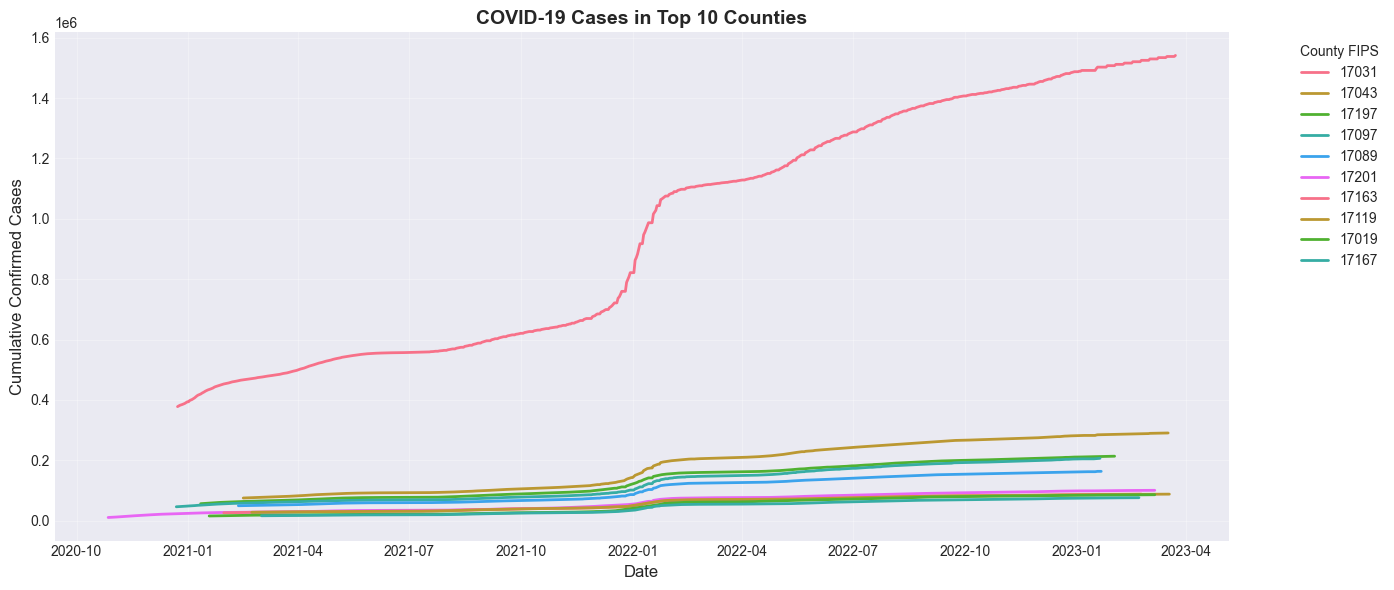

In [34]:
# Get top 10 counties by total confirmed cases
top_counties = df.groupby('location')['confirmed'].max().sort_values(ascending=False).head(10)
print("Top 10 Counties by Total Confirmed Cases:")
print(top_counties)

# Plot confirmed cases over time for top counties
fig, ax = plt.subplots(figsize=(14, 6))
for county in top_counties.index:
    county_data = df[df['location'] == county].sort_values('date')
    ax.plot(county_data['date'], county_data['confirmed'], label=county, linewidth=2)

ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Cumulative Confirmed Cases', fontsize=12)
ax.set_title('COVID-19 Cases in Top 10 Counties', fontsize=14, fontweight='bold')
ax.legend(title='County FIPS', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
import plotly.graph_objects as go

# Plot confirmed cases over time for top counties using Plotly
fig = go.Figure()

for county in top_counties.index:
    county_data = df[df['location'] == county].sort_values('date')
    fig.add_trace(go.Scatter(x=county_data['date'], 
                             y=county_data['confirmed'], 
                             mode='lines', 
                             name=county, 
                             line=dict(width=2)))

fig.update_layout(
    title='COVID-19 Cases in Top 10 Counties',
    xaxis_title='Date',
    yaxis_title='Cumulative Confirmed Cases',
    legend_title='County FIPS',
    template='seaborn'
)

fig.show()

In [25]:
# Cases per capita (for latest date)
latest_date = df['date'].max()
latest_data = df[df['date'] == latest_date].copy()
latest_data['cases_per_100k'] = (latest_data['confirmed'] / latest_data['population']) * 100000
latest_data['deaths_per_100k'] = (latest_data['deaths'] / latest_data['population']) * 100000

# Top 15 counties by cases per capita
top_per_capita = latest_data.nlargest(15, 'cases_per_100k')[['location', 'cases_per_100k', 'deaths_per_100k', 'population']]
print(f"\nTop 15 Counties by Cases per 100k (as of {latest_date.date()}):")
print(top_per_capita)


Top 15 Counties by Cases per 100k (as of 2023-05-10):
      location  cases_per_100k  deaths_per_100k  population
6607     17031             NaN              NaN     5150233


## 7. Policy Intervention Analysis

In [29]:
import plotly.graph_objects as go

# Policy measures over time (state average)
policy_cols_available = [col for col in policy_cols if col in df.columns]
policy_time = df.groupby('date')[policy_cols_available].mean()

# Plot key policy indices
key_indices = ['stringency_index', 'government_response_index', 'containment_health_index']
key_indices = [col for col in key_indices if col in policy_time.columns]

if key_indices:
    fig = go.Figure()
    for idx in key_indices:
        fig.add_trace(go.Scatter(x=policy_time.index, y=policy_time[idx], mode='lines', name=idx.replace('_', ' ').title()))

    fig.update_layout(
        title='Policy Response Indices Over Time',
        xaxis_title='Date',
        yaxis_title='Index Value',
        legend_title='Policy Indices',
        template='seaborn'
    )
    
    fig.show()

In [33]:
import plotly.express as px

# Heatmap of policy measures
policy_measures = ['school_closing', 'workplace_closing', 'cancel_events', 
                   'gatherings_restrictions', 'stay_home_restrictions', 'facial_coverings']
policy_measures = [col for col in policy_measures if col in df.columns]

if policy_measures:
    policy_avg = df.groupby('date')[policy_measures].mean().reset_index()

    # Create a heatmap using Plotly
    fig = px.imshow(policy_avg[policy_measures].T, 
                     labels=dict(x="Date", y="Policy Measure", color="Restriction Level"),
                     x=policy_avg['date'],
                     y=policy_measures,
                     color_continuous_scale='YlOrRd',
                     title='Policy Restrictions Over Time (Heatmap)')
    
    fig.update_xaxes(tickangle=45)
    fig.show()

## 8. Correlation Analysis

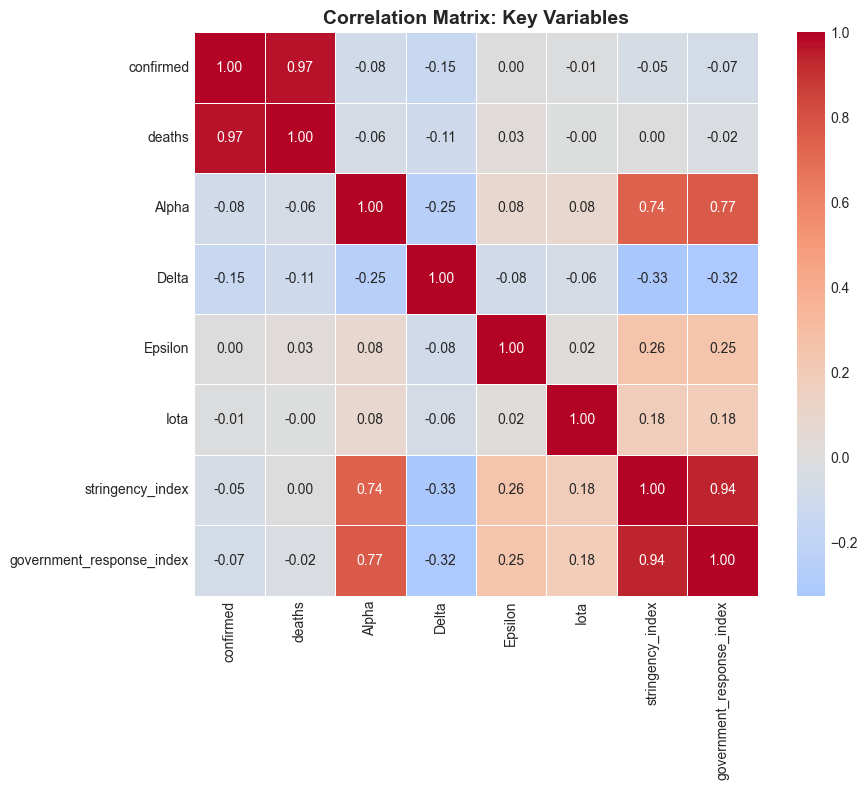

In [35]:
# Select numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Remove id-like columns
numeric_cols = [col for col in numeric_cols if col not in ['location', 'latitude', 'longitude']]

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot correlation heatmap (for key variables)
key_vars = ['confirmed', 'deaths'] + variant_cols + ['stringency_index', 'government_response_index']
key_vars = [col for col in key_vars if col in corr_matrix.columns]

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix.loc[key_vars, key_vars], 
            annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=0.5, ax=ax)
ax.set_title('Correlation Matrix: Key Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 9. Data Quality Checks

In [36]:
# Check for negative values in cumulative columns
cumulative_cols = ['confirmed', 'deaths', 'tests', 'vaccines']
cumulative_cols = [col for col in cumulative_cols if col in df.columns]

print("Negative values in cumulative columns:")
for col in cumulative_cols:
    neg_count = (df[col] < 0).sum()
    if neg_count > 0:
        print(f"  {col}: {neg_count} negative values ({neg_count/len(df)*100:.2f}%)")
    else:
        print(f"  {col}: No negative values")

Negative values in cumulative columns:
  confirmed: No negative values
  deaths: No negative values


In [37]:
# Check for monotonicity in cumulative columns (within each county)
print("\nMonotonicity check for cumulative columns:")
for col in cumulative_cols:
    df_sorted = df.sort_values(['location', 'date'])
    df_sorted['diff'] = df_sorted.groupby('location')[col].diff()
    decreases = (df_sorted['diff'] < 0).sum()
    if decreases > 0:
        print(f"  {col}: {decreases} decreases detected (non-monotonic)")
    else:
        print(f"  {col}: Monotonic (no decreases)")


Monotonicity check for cumulative columns:
  confirmed: 21 decreases detected (non-monotonic)
  deaths: 37 decreases detected (non-monotonic)


In [38]:
# Check date coverage per county
date_coverage = df.groupby('location')['date'].agg(['min', 'max', 'count'])
date_coverage['days_span'] = (date_coverage['max'] - date_coverage['min']).dt.days
date_coverage['coverage_ratio'] = date_coverage['count'] / (date_coverage['days_span'] + 1)

print("\nDate coverage statistics:")
print(date_coverage['coverage_ratio'].describe())
print(f"\nCounties with incomplete coverage (<0.9):")
print(date_coverage[date_coverage['coverage_ratio'] < 0.9].sort_values('coverage_ratio'))


Date coverage statistics:
count    97.000000
mean      0.146778
std       0.161630
min       0.014815
25%       0.045549
50%       0.088720
75%       0.211488
max       1.000000
Name: coverage_ratio, dtype: float64

Counties with incomplete coverage (<0.9):
                min        max  count  days_span  coverage_ratio
location                                                        
17071    2021-08-20 2023-02-10      8        539        0.014815
17151    2021-04-19 2022-09-08      9        507        0.017717
17025    2021-07-15 2023-01-18     12        552        0.021700
17131    2021-06-21 2022-10-08     12        474        0.025263
17047    2021-04-21 2022-11-15     15        573        0.026132
17159    2021-05-01 2022-08-15     13        471        0.027542
17013    2021-11-29 2022-12-14     11        380        0.028871
17171    2021-04-23 2022-07-13     13        446        0.029083
17059    2021-03-24 2022-07-13     14        476        0.029350
17153    2021-03-30 2023-0

## 10. Summary

In [39]:
print("=" * 70)
print("DATASET SUMMARY")
print("=" * 70)
print(f"\nDataset: combined_prevalence_and_exogenous.csv")
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Date range: {df['date'].min().date()} to {df['date'].max().date()}")
print(f"Duration: {(df['date'].max() - df['date'].min()).days} days")
print(f"Counties: {df['location'].nunique()}")
print(f"\nTotal confirmed cases (latest): {df[df['date'] == df['date'].max()]['confirmed'].sum():,.0f}")
print(f"Total deaths (latest): {df[df['date'] == df['date'].max()]['deaths'].sum():,.0f}")
print(f"\nVariants tracked: {', '.join(variant_cols)}")
print(f"Policy measures tracked: {len(policy_cols_available)}")
print(f"\nMissing data:")
print(f"  Columns with >50% missing: {(missing_pct > 50).sum()}")
print(f"  Columns with >10% missing: {(missing_pct > 10).sum()}")

DATASET SUMMARY

Dataset: combined_prevalence_and_exogenous.csv
Shape: 9,413 rows × 35 columns
Date range: 2020-10-27 to 2023-05-10
Duration: 925 days
Counties: 97

Total confirmed cases (latest): 0
Total deaths (latest): 0

Variants tracked: Alpha, Delta, Epsilon, Iota
Policy measures tracked: 18

Missing data:
  Columns with >50% missing: 0
  Columns with >10% missing: 2
